In [45]:
import pandas as pd

uri = "https://gist.githubusercontent.com/guilhermesilveira/12291c548acaf544596795709020e3db/raw/325bdef098bd9cbc2189215b7e32e22f437f29f3/projetos.csv"
dados = pd.read_csv(uri)
dados.head()

,nao_finalizado,horas_esperadas,preco
0,0,75.0,6985.000000
1,1,0.0,4325.293458
2,0,87.0,14205.000000
3,1,13.0,100.000000
4,0,2.0,202.000000


In [47]:
dados["finalizado"] = dados["nao_finalizado"].map({1: 0, 0: 1})
dados.head()

,nao_finalizado,horas_esperadas,preco,finalizado
0,0,75.0,6985.000000,1
1,1,0.0,4325.293458,0
2,0,87.0,14205.000000,1
3,1,13.0,100.000000,0
4,0,2.0,202.000000,1


<Axes: xlabel='horas_esperadas', ylabel='preco'>

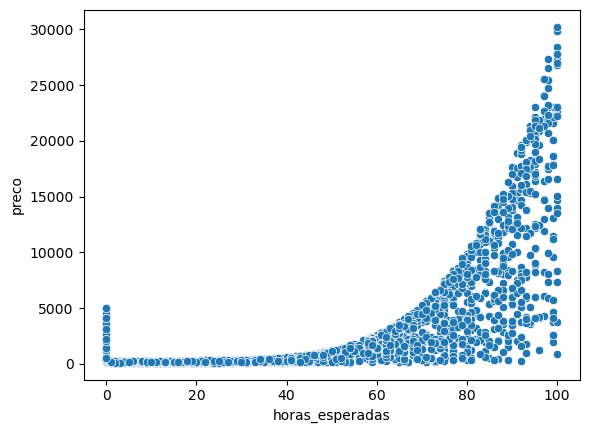

In [48]:
import seaborn as sns

sns.scatterplot(x = 'horas_esperadas', y = 'preco', data = dados)

<Axes: xlabel='horas_esperadas', ylabel='preco'>

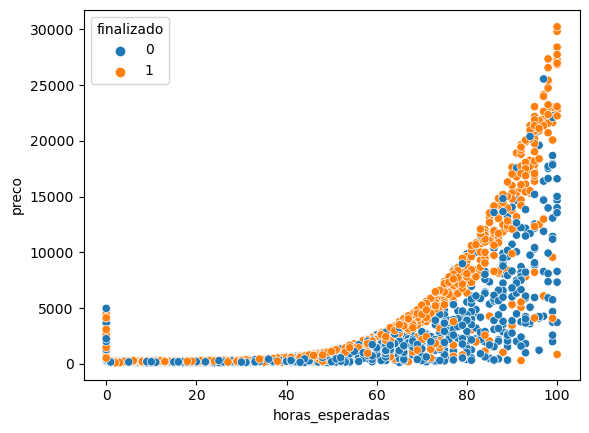

In [49]:
sns.scatterplot(x = 'horas_esperadas', y = 'preco', hue = 'finalizado', data = dados)

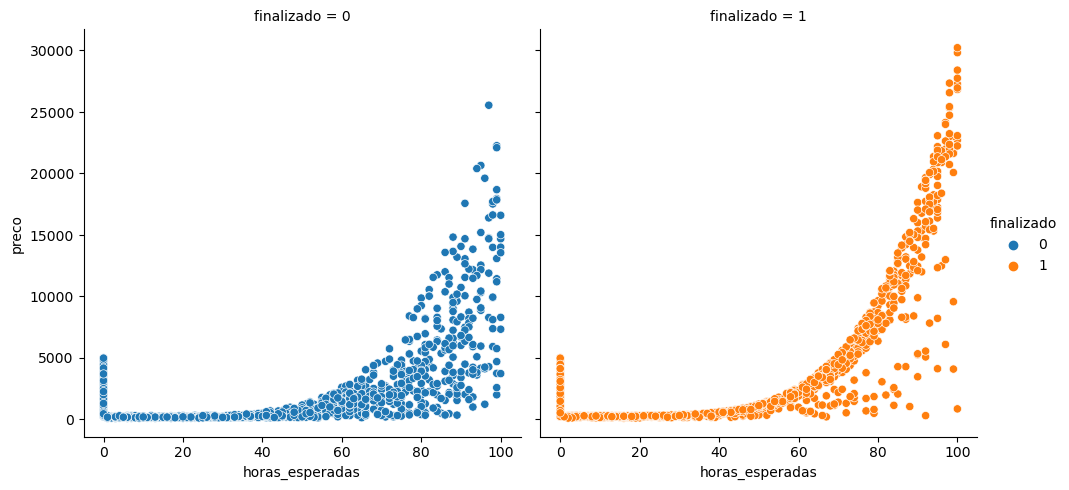

In [50]:
sns.relplot(x = 'horas_esperadas', y = 'preco', hue = 'finalizado', col = 'finalizado', data = dados)

In [52]:
# jogar fora as linhas com horas esperadas = 0
dados = dados.query('horas_esperadas > 0')
dados.head()


,nao_finalizado,horas_esperadas,preco,finalizado
0,0,75.0,6985.0,1
2,0,87.0,14205.0,1
3,1,13.0,100.0,0
4,0,2.0,202.0,1
5,0,49.0,1096.0,1


In [53]:
x = dados[['horas_esperadas', 'preco']]
y = dados['finalizado']

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

SEED = 20

treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, 
                                                        random_state = SEED,
                                                        stratify = y)

print(f'Treinaremos com {len(treino_x)}')
print(f'Treinaremos com {len(teste_x)}')


modelo = LinearSVC()
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

taxa_de_acerto = accuracy_score(teste_y, previsoes) * 100
print('A acurácia foi %.2f%%' % taxa_de_acerto)

Treinaremos com 1617
Treinaremos com 540
A acurácia foi 56.67%


/Users/marianamattos/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [57]:
import numpy as np
previsoes_de_base = np.ones(540)
taxa_de_acerto = accuracy_score(teste_y, previsoes_de_base) * 100
print('A acurácia do algoritimo de baseline %.2f%%' % taxa_de_acerto)

A acurácia do algoritimo de baseline 52.59%


<Axes: xlabel='horas_esperadas', ylabel='preco'>

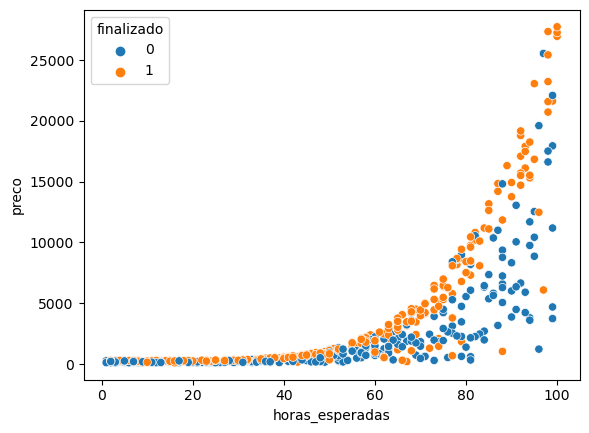

In [34]:
sns.scatterplot(x = 'horas_esperadas', y = 'preco', hue = teste_y, data = teste_x)

In [58]:
x_min = teste_x['horas_esperadas'].min()
x_max = teste_x['horas_esperadas'].max()
y_min = teste_x['preco'].min()
y_max = teste_x['preco'].max()
print(x_min, x_max, y_min, y_max)

1.0 100.0 102.0 30223.0


In [59]:
pixels = 100
eixo_x = np.arange(x_min, x_max, (x_max - x_min) / pixels)
eixo_y = np.arange(y_min, y_max, (y_max - y_min) / pixels)

In [60]:
xx, yy = np.meshgrid(eixo_x, eixo_y)
pontos = np.c_[xx.ravel(), yy.ravel()]
pontos

array([[1.000000e+00, 1.020000e+02],
       [1.990000e+00, 1.020000e+02],
       [2.980000e+00, 1.020000e+02],
       ...,
       [9.703000e+01, 2.992179e+04],
       [9.802000e+01, 2.992179e+04],
       [9.901000e+01, 2.992179e+04]])

In [61]:
Z = modelo.predict(pontos)
Z = Z.reshape(xx.shape)
Z

/Users/marianamattos/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  warnings.warn(


array([[1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]])

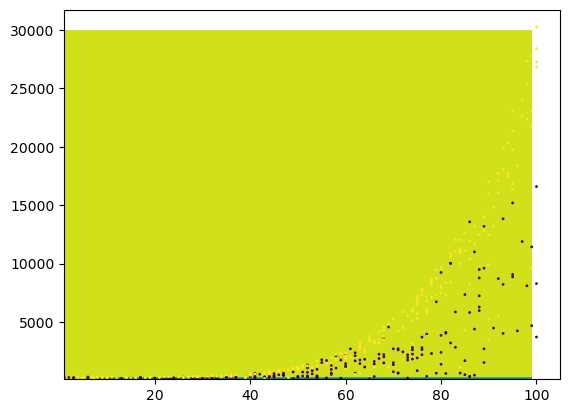

In [62]:
import matplotlib.pyplot as plt

plt.contourf(xx, yy, Z)

plt.scatter(teste_x['horas_esperadas'], teste_x['preco'], c = teste_y, s = 1)

# SVC

In [63]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

SEED = 20

treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, 
                                                        random_state = SEED,
                                                        stratify = y)
print(f'Treinaremos com {len(treino_x)}')
print(f'Treinaremos com {len(teste_x)}')

modelo = SVC(gamma = 'auto')
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

taxa_de_acerto = accuracy_score(teste_y, previsoes) * 100
print('A acurácia foi %.2f%%' % taxa_de_acerto)

Treinaremos com 1617
Treinaremos com 540
A acurácia foi 57.78%


/Users/marianamattos/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


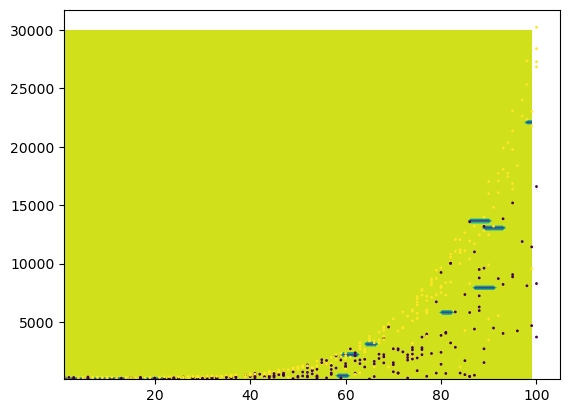

In [64]:
x_min = teste_x['horas_esperadas'].min()
x_max = teste_x['horas_esperadas'].max()
y_min = teste_x['preco'].min()
y_max = teste_x['preco'].max()


pixels = 100
eixo_x = np.arange(x_min, x_max, (x_max - x_min) / pixels)
eixo_y = np.arange(y_min, y_max, (y_max - y_min) / pixels)

xx, yy = np.meshgrid(eixo_x, eixo_y)
pontos = np.c_[xx.ravel(), yy.ravel()]

Z = modelo.predict(pontos)
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z)

plt.scatter(teste_x['horas_esperadas'], teste_x['preco'], c = teste_y, s = 1)

In [65]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

SEED = 20

raw_treino_x, raw_teste_x, treino_y, teste_y = train_test_split(x, y, 
                                                        random_state = SEED,
                                                        stratify = y)
print(f'Treinaremos com {len(raw_treino_x)}')
print(f'Treinaremos com {len(raw_teste_x)}')


scaler = StandardScaler()
scaler.fit(raw_treino_x)

treino_x = scaler.transform(raw_treino_x)
teste_x = scaler.transform(raw_teste_x)

modelo = SVC(gamma = 'auto')
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

taxa_de_acerto = accuracy_score(teste_y, previsoes) * 100
print('A acurácia foi %.2f%%' % taxa_de_acerto)

Treinaremos com 1617
Treinaremos com 540
A acurácia foi 68.52%


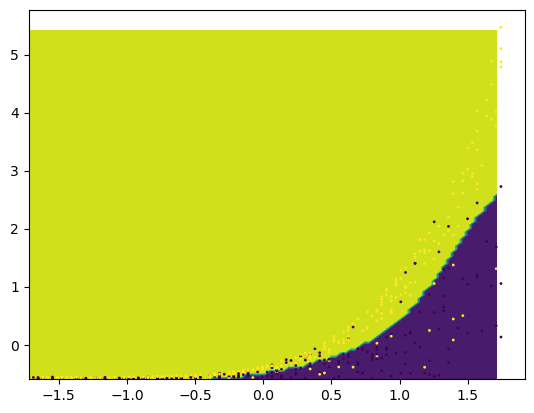

In [67]:
data_col1 = teste_x[:, 0]
data_col2 = teste_x[:, 1]

x_min = data_col1.min()
x_max = data_col1.max()
y_min = data_col2.min()
y_max = data_col2.max()


pixels = 100
eixo_x = np.arange(x_min, x_max, (x_max - x_min) / pixels)
eixo_y = np.arange(y_min, y_max, (y_max - y_min) / pixels)

xx, yy = np.meshgrid(eixo_x, eixo_y)
pontos = np.c_[xx.ravel(), yy.ravel()]

Z = modelo.predict(pontos)
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z)

plt.scatter(data_col1, data_col2, c = teste_y, s = 1)